In [1]:
import sys, os
import numpy as np

sys.path.append(os.path.join(os.path.pardir, 'python'))
from tcg_slb.phasediagram import ScipyPDReactiveODE, PETScPDReactiveODE, FEniCSPDReactiveODE
from tcg_slb.base import *

#%matplotlib widget

In [2]:
pv = repr(sys.version_info.major)+'.'+repr(sys.version_info.minor)
sys.path.append(os.path.join(os.path.pardir, 'database', 'install', 'MgFeSiO4_all_slb_rx', 'lib', 'python'+pv, 'site-packages'))

import py_MgFeSiO4_all_slb_rx as tcgdb
rxn = tcgdb.MgFeSiO4_all_slb_rx()
rxn.report()

Reaction object: MgFeSiO4_all_slb_rx

Phase 0 Olivine_slb_ph (ol)
     Endmember 0 Forsterite_slb_em : Mg2SiO4_(ol)
     Endmember 1 Fayalite_slb_em : Fe2SiO4_(ol)
Phase 1 Wadsleyite_slb_ph (wa)
     Endmember 0 MgWadsleyite_slb_em : Mg2SiO4_(wa)
     Endmember 1 FeWadsleyite_slb_em : Fe2SiO4_(wa)
Phase 2 Ringwoodite_slb_ph (ri)
     Endmember 0 MgRingwoodite_slb_em : Mg2SiO4_(ri)
     Endmember 1 FeRingwoodite_slb_em : Fe2SiO4_(ri)
Phase 3 MgFePerovskite_slb_ph (mgfepv)
     Endmember 0 MgPerovskite_slb_em : MgSiO3_(mgfepv)
     Endmember 1 FePerovskite_slb_em : FeSiO3_(mgfepv)
Phase 4 Magnesiowuestite_slb_ph (mw)
     Endmember 0 Periclase_slb_em : MgO_(mw)
     Endmember 1 Wuestite_slb_em : FeO_(mw)
Phase 5 Stishovite_slb_ph (st)
     Endmember 0 Stishovite_slb_em : SiO2_(st)

Reaction 0
     Mg2SiO4_(ol) -> Mg2SiO4_(wa)
Reaction 1
     Fe2SiO4_(ol) -> Fe2SiO4_(wa)
Reaction 2
     Mg2SiO4_(ol) -> Mg2SiO4_(ri)
Reaction 3
     Fe2SiO4_(ol) -> Fe2SiO4_(ri)
Reaction 4
     Mg2SiO4_(wa) 

### Setup ODE

In [3]:
odef = FEniCSPDReactiveODE(rxn)

#### Temperature, pressure, composition

In [4]:
# initial temperature, pressure and phase volume fraction
Ti = 1673.                # Kelvin
pi = GPa2Bar(30.)         # bars
Ci0 = [0.8, 0.2]
i0 =  0                   # initial phase index
end = 1000
pi

300000.0

#### Initial conditions

In [5]:
Fi = np.zeros(odef.I)
Fi[i0] = 1.
Cik = np.zeros(odef.K)
for i in range(odef.I):
    if odef.Kis[i] == 1:
        Cik[sum(odef.Kis[:i]):sum(odef.Kis[:i+1])] = 1.
    else:
        Cik[sum(odef.Kis[:i]):sum(odef.Kis[:i+1])][:2] = np.asarray(Ci0)
        

print(Fi, Cik)

[1. 0. 0. 0. 0. 0.] [0.8 0.2 0.8 0.2 0.8 0.2 0.8 0.2 0.8 0.2 1. ]


## FEniCS

In [6]:
odef.solve(Ti,pi,Fi,Cik,end,print_norms=True)

In [17]:
odef.stdout.split('\n')[-100:]

['    FormRHSFunction: inf-norm f = 9.772142954306189e-08',
 '    0 SNES Function norm 7.118159388923739e-07',
 '  In FormIFunction',
 '    FormIFunction: 2-norm u = 2.3679627484655383',
 '    FormIFunction: inf-norm u = 0.9999998054064416',
 '    FormIFunction: 2-norm u_t = 7.858702461774882e-07',
 '    FormIFunction: inf-norm u_t = 3.3883671690659867e-07',
 '    FormIFunction: 2-norm f = 7.858702461774882e-07',
 '    FormIFunction: inf-norm f = 3.3883671690659867e-07',
 '  In FormRHSFunction',
 '    FormRHSFunction: 2-norm u = 2.3679627484655383',
 '    FormRHSFunction: inf-norm u = 0.9999998054064416',
 '    FormRHSFunction: 2-norm f = 1.485951838080681e-07',
 '    FormRHSFunction: inf-norm f = 9.487222946676636e-08',
 '    0 SNES Function norm 7.499688141944671e-07',
 '4421 TS dt 0.06137326040664903 time 999.0836118900861',
 '  In FormIFunction',
 '    FormIFunction: 2-norm u = 2.3679627517302912',
 '    FormIFunction: inf-norm u = 0.9999998054065232',
 '    FormIFunction: 2-norm u

In [7]:
odef.stime

943.9333486009855

In [8]:
odef.final_phases(1.e-2)

(array(['MgFePerovskite_slb_ph', 'Magnesiowuestite_slb_ph'], dtype='<U23'),
 array(['mgfepv', 'mw'], dtype='<U6'))

## PETSc

In [9]:
odep = PETScPDReactiveODE(rxn)

In [10]:
odep.solve(Ti,pi,Fi,Cik,end,print_norms=True)

In [18]:
odep.stdout.split('\n')[-100:]

['    FormIFunction: inf-norm u = 0.9999998058677666',
 '    FormIFunction: 2-norm u_t = 1.5217467653344057e-06',
 '    FormIFunction: inf-norm u_t = 8.445400201395614e-07',
 '    FormIFunction: 2-norm f = 1.5217467653344057e-06',
 '    FormIFunction: inf-norm f = 8.445400201395614e-07',
 '  In FormRHSFunction',
 '    FormRHSFunction: 2-norm u = 2.367962040429696',
 '    FormRHSFunction: inf-norm u = 0.9999998058677666',
 '    FormRHSFunction: 2-norm f = 5.039039495242763e-07',
 '    FormRHSFunction: inf-norm f = 2.806450822911685e-07',
 '    0 SNES Function norm 1.0311792744831116e-06',
 '  In FormIJacobian',
 '    a (shift) = 20.931431725339856',
 '    FormIJacobian: 2-norm u = 2.367962040429696',
 '    FormIJacobian: inf-norm u = 0.9999998058677666',
 '    FormIJacobian: 2-norm u_t = 1.5217467653344057e-06',
 '    FormIJacobian: inf-norm u_t = 8.445400201395614e-07',
 '    FormIJacobian: Frobenius norm A = 86.30250389898076',
 '    FormIJacobian: inf-norm A = 20.931431725339856',
 '

In [11]:
odep.stime

10.304355708998628

In [12]:
odep.final_phases(1.e-2)

(array(['MgFePerovskite_slb_ph', 'Magnesiowuestite_slb_ph'], dtype='<U23'),
 array(['mgfepv', 'mw'], dtype='<U6'))

## Plotting

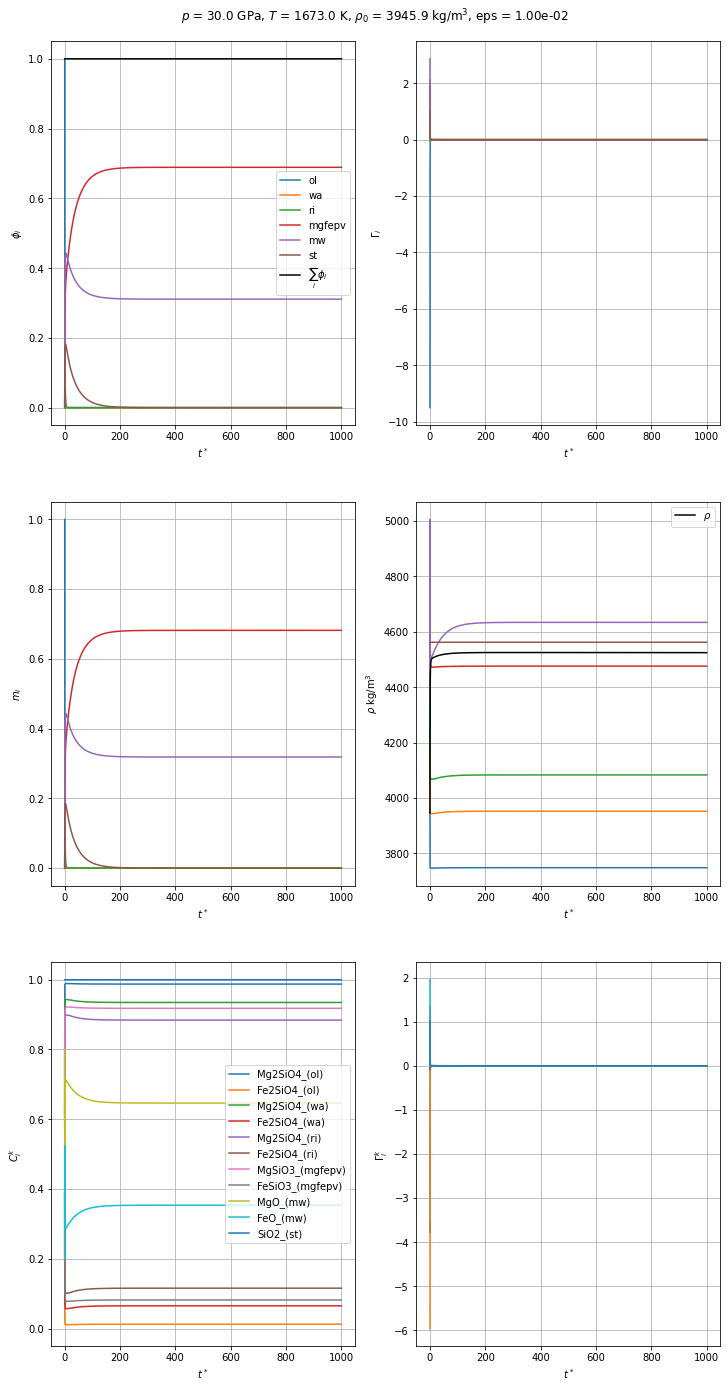

In [14]:
odef.plot()

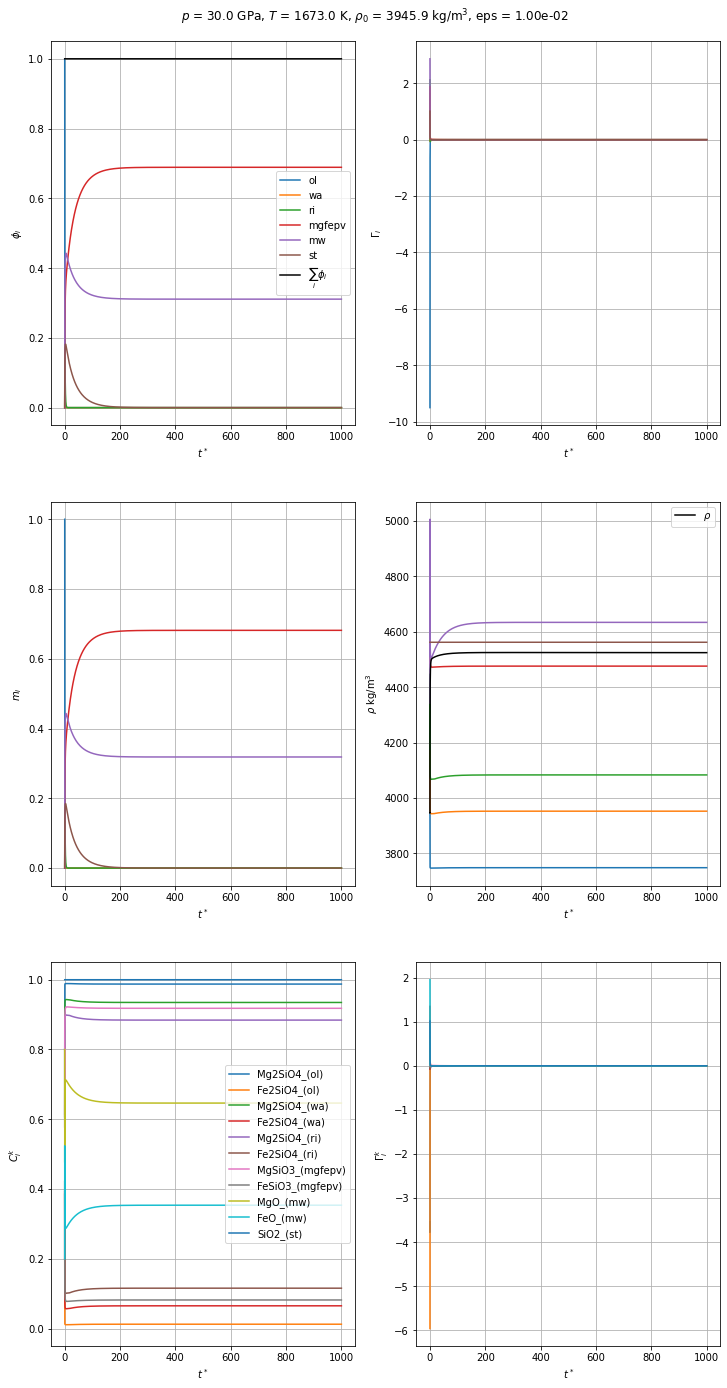

In [15]:
odep.plot()